In [ ]:
from multiprocessing.pool import ThreadPool
from concurrent.futures import ThreadPoolExecutor
from threading import Thread
from time import sleep
import asyncio


In [ ]:
class Plotter:
    def __init__(self, loop=None) -> None:
        self.running = False
        self.loop = loop

    def start(self):
        print('Start plotter')
        async def update():
            #print('inside update()')
            i = 0
            self.running = True
            while self.running:
                print('Plot:', i)   
                i += 1     
                await asyncio.sleep(2)
            print('update is done!')

        self.loop.run_until_complete(update())

    def stop(self):
        print('Stop plotter')
        self.running = False
    

In [ ]:
class thread_sequence(Thread):
    def __init__(self, args=None, loop=None, **kwargs):
        super().__init__(**kwargs)
        self.args = args
        self.loop = loop
        #self.plots = (Plotter(loop) for _ in args)
        #self.threads = (Thread(target=main, args=arg, kwargs={'plot':}) for arg,plot in zip(args, )

    def run(self):
        #loop = asyncio.new_event_loop()
        # for th,pl in zip(self.threads, self.plots):
        for arg in self.args:
            plot = Plotter(loop=self.loop)
            th = Thread(target=main, args=arg, kwargs={'plot':plot})
            #print('RUN', th, pl)
            th.start()
            #print('th.start()')
            plot.start()
            #th.join()
            #print('th.join()')
            
            #plot.stop()
            #self.func and self.func()
        #loop.close()


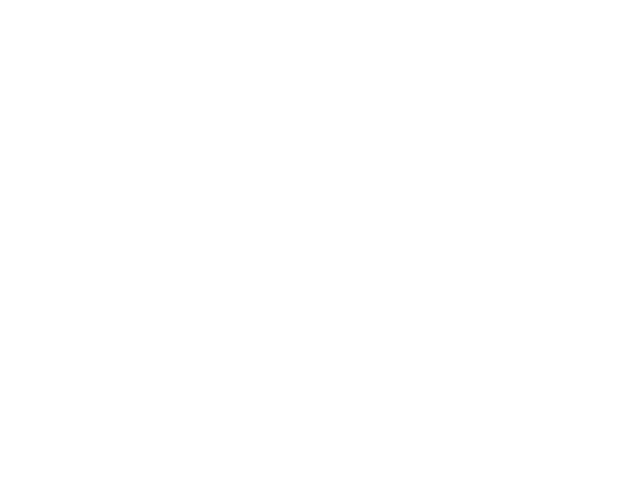

Main:  A 0


RuntimeError: Cannot run the event loop while another loop is running

Main:  A 1
Main:  A 2
Main:  A 3
Main:  A 4
Main:  A 5
Main:  A 6
Main:  A 7
Main:  A 8
Main:  A 9
Main:  A 10
Main:  A 11
Main:  A 12
Main:  A 13
Main:  A 14
Main:  A 15
Main:  A 16
Main:  A 17
Main:  A 18
Main:  A 19
LivePlot is not running!


In [1]:
from IORlib.utils import LivePlot
from threading import Thread
import matplotlib.pyplot as pl
import asyncio
from pathlib import Path
from time import sleep
from numpy import genfromtxt

def main(tag):
    for i in range(20):
        sleep(1)
        with open('data.txt', 'a') as file:
           file.write(f'{i} {i**2}\n')
        print(f'Main: ', tag, i)
    #print('Main is done!')


def main_with_plot(*args, plot=None):
    main(*args)
    plot and plot.stop()

def plot_func():
    #print('PLOT')
    if Path('data.txt').is_file():
        data = genfromtxt('data.txt')
        if data.ndim > 1:
            pl.plot(data[:,0], data[:,1], 'ro')

def main_thread_with_plot(args, loop):
    for arg in args:
        #plot = Plotter(loop)
        Path('data.txt').unlink(missing_ok=True)
        plot = LivePlot(func=plot_func, loop=loop)
        thread = Thread(target=main_with_plot, args=arg, kwargs={'plot':plot})
        thread.start()
        plot.start(wait=0.1)


def thread_of_main(args, loop):
    plot = LivePlot(func=plot_func, loop=loop)
    thread = Thread(target=main_with_plot, args=args, kwargs={'plot':plot})
    thread.start()
    plot.start(wait=0.1)
    #thread.join()
    print('end of thread')

def tester():    
    loop = asyncio.new_event_loop()
    Path('data.txt').unlink(missing_ok=True)
    #thread = Thread(target=thread_of_main, args=('A', loop))
    #thread.start()
    def inner():
        plot = LivePlot(func=plot_func, loop=loop)
        thread = Thread(target=main_with_plot, args=('A',), kwargs={'plot':plot})
        thread.start()
        plot.start(wait=0.1)
    inner()
    print('END')

tester()

In [ ]:
from IORlib.utils import LivePlot
from threading import Thread
import matplotlib.pyplot as pl
import asyncio
from pathlib import Path
from time import sleep
from numpy import genfromtxt

def main(tag):
    for i in range(20):
        sleep(1)
        with open('data.txt', 'a') as file:
           file.write(f'{i} {i**2}\n')
        print(f'Main: ', tag, i)
    #print('Main is done!')


class PlotWhileRunning:
    def __init__(self, run_func, args=None, kwargs=None) -> None:
        self.run_func = run_func
        self.args = args
        self.kwargs = kwargs
        self.loop = None

    def __enter__ (self):
        self.loop = asyncio.new_event_loop()
        self.runner = Thread(target=main_thread_with_plot, args=(args, loop))

    def __exit__(self, exc_type, exc_value, traceback):
        if self.loop:
            self.loop.close()

    def _run_func(self, plot=None):
        self.run_func(*self.args, **self.kwargs)
        plot and plot.stop()

def plot_func():
    #print('PLOT')
    if Path('data.txt').is_file():
        data = genfromtxt('data.txt')
        if data.ndim > 1:
            pl.plot(data[:,0], data[:,1], 'ro')

def main_thread_with_plot(args, loop):
    for arg in args:
        #plot = Plotter(loop)
        Path('data.txt').unlink(missing_ok=True)
        plot = LivePlot(func=plot_func, loop=loop)
        thread = Thread(target=main_with_plot, args=arg, kwargs={'plot':plot})
        thread.start()
        plot.start(wait=0.1)

loop = asyncio.new_event_loop()
args=(('A',),('B',))
runs = Thread(target=main_thread_with_plot, args=(args, loop))
runs.start()
print('END')
